In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from scipy.stats import norm, skew
import numpy as np
import seaborn as sns

In [3]:
import feather
#Feathers
X_train_FE = pd.read_feather(r'C:\Users\user\Desktop\Kaggle\HousePrices\Feathers\FE\X_train_FE.feather')
test_FE = pd.read_feather(r'C:\Users\user\Desktop\Kaggle\HousePrices\Feathers\FE\test_FE.feather')

train = pd.read_csv(r'C:\Users\user\Desktop\Kaggle\HousePrices\Data\train.csv', low_memory = False)
test_raw = pd.read_csv(r'C:\Users\user\Desktop\Kaggle\HousePrices\Data\test.csv', low_memory = False)

In [4]:
print("X_train_FE:", X_train_FE.shape, "    test_FE:", test_FE.shape)

X_train_FE: (1453, 318)     test_FE: (1459, 318)


In [5]:
from IPython.display import display

def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)
            
display_all(X_train_FE.head(10).transpose())

,0,1,2,3,4,5,6,7,8,9
LotFrontage,18.144572,20.673625,18.668046,17.249650,21.314282,21.472480,19.854050,20.673625,15.558090,15.362900
LotArea,13.833055,14.117918,14.476513,14.106197,15.022009,14.998258,14.228590,14.294345,13.126989,13.546136
OverallQual,7.000000,6.000000,7.000000,7.000000,8.000000,5.000000,8.000000,7.000000,7.000000,5.000000
OverallCond,3.991517,6.000033,3.991517,3.991517,3.991517,3.991517,3.991517,4.679500,3.991517,4.679500
YearBuilt,2003.000000,1976.000000,2001.000000,1915.000000,2000.000000,1993.000000,2004.000000,1973.000000,1931.000000,1939.000000
YearRemodAdd,2003.000000,1976.000000,2002.000000,1970.000000,2000.000000,1995.000000,2005.000000,1973.000000,1950.000000,1950.000000
MasVnrArea,19.433174,0.000000,17.768840,0.000000,25.404163,0.000000,18.962283,21.355330,0.000000,0.000000
BsmtFinSF1,144.117862,181.719186,110.441033,61.795315,136.624601,147.876483,230.755721,165.705771,0.000000,164.606644
BsmtFinSF2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.749196,0.000000,0.000000
BsmtUnfSF,29.991052,44.135410,56.896528,64.808848,61.166371,17.718036,47.147306,37.422800,90.703475,28.754166


In [6]:
# remove houses greater than 4000sf as rcommended by https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
#original df_raw = df_raw.drop(df_raw[(df_raw['GrLivArea'] > 4000) & (df_raw['SalePrice'] < 300000)].index) 
#remove greater than 4000 at end of data procesing
train = train.drop(train[(train['GrLivArea'] > 4500)].index)

In [7]:
#log of sale price and y_train
train['SalePrice'] = np.log(train['SalePrice'])
y_train = train['SalePrice']

In [8]:
#drop saleprice and combine into one df
n_train= train.shape[0]
n_test = test_raw.shape[0]

train.drop(['SalePrice'], axis = 1, inplace = True)

all_data = pd.concat((train,test_raw)).reset_index(drop = True)
print( "all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 80)


In [9]:
display_all(all_data.head(10).transpose())

,0,1,2,3,4,5,6,7,8,9
Id,1,2,3,4,5,6,7,8,9,10
MSSubClass,60,20,60,70,60,50,20,60,50,190
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL
LotFrontage,65,80,68,60,84,85,75,NaN,51,50
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1,IR1,Reg,IR1,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub


In [10]:
#drop Id
all_data.drop("Id", axis = 1, inplace = True)
all_data.shape

(2917, 79)

## NA Processing

In [11]:
nulls = np.sum(all_data.isnull())
nullcols = nulls.loc[(nulls != 0)]
dtypes = all_data.dtypes
dtypes2 = dtypes.loc[(nulls != 0)]
info = pd.concat([nullcols, dtypes2], axis=1).sort_values(by=0, ascending=False)
print(info)
print("There are", len(nullcols), "columns with missing values")

                 0        1
PoolQC        2908   object
MiscFeature   2812   object
Alley         2719   object
Fence         2346   object
FireplaceQu   1420   object
LotFrontage    486  float64
GarageFinish   159   object
GarageQual     159   object
GarageCond     159   object
GarageYrBlt    159  float64
GarageType     157   object
BsmtExposure    82   object
BsmtCond        82   object
BsmtQual        81   object
BsmtFinType2    80   object
BsmtFinType1    79   object
MasVnrType      24   object
MasVnrArea      23  float64
MSZoning         4   object
BsmtFullBath     2  float64
BsmtHalfBath     2  float64
Functional       2   object
Utilities        2   object
GarageArea       1  float64
GarageCars       1  float64
Electrical       1   object
KitchenQual      1   object
TotalBsmtSF      1  float64
BsmtUnfSF        1  float64
BsmtFinSF2       1  float64
BsmtFinSF1       1  float64
Exterior2nd      1   object
Exterior1st      1   object
SaleType         1   object
There are 34 columns

In [12]:
all_data['Functional'] = all_data['Functional'].fillna('Typ')
all_data['Electrical'] = all_data['Electrical'].fillna("SBrkr")
all_data['KitchenQual'] = all_data['KitchenQual'].fillna("TA")

all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [13]:
all_data.loc[2418, 'PoolQC'] = 'Fa'
all_data.loc[2501, 'PoolQC'] = 'Gd'
all_data.loc[2597, 'PoolQC'] = 'Fa'

In [14]:
all_data.loc[2124, 'GarageYrBlt'] = all_data['GarageYrBlt'].median()
all_data.loc[2574, 'GarageYrBlt'] = all_data['GarageYrBlt'].median()

all_data.loc[2124, 'GarageFinish'] = all_data['GarageFinish'].mode()[0]
all_data.loc[2574, 'GarageFinish'] = all_data['GarageFinish'].mode()[0]

all_data.loc[2574, 'GarageCars'] = all_data['GarageCars'].median()

all_data.loc[2124, 'GarageArea'] = all_data['GarageArea'].median()
all_data.loc[2574, 'GarageArea'] = all_data['GarageArea'].median()

all_data.loc[2124, 'GarageQual'] = all_data['GarageQual'].mode()[0]
all_data.loc[2574, 'GarageQual'] = all_data['GarageQual'].mode()[0]

all_data.loc[2124, 'GarageCond'] = all_data['GarageCond'].mode()[0]
all_data.loc[2574, 'GarageCond'] = all_data['GarageCond'].mode()[0]

In [15]:
all_data.loc[332, 'BsmtFinType2'] = 'ALQ' #since smaller than SF1
all_data.loc[947, 'BsmtExposure'] = 'No' 
all_data.loc[1485, 'BsmtExposure'] = 'No'
all_data.loc[2038, 'BsmtCond'] = 'TA'
all_data.loc[2183, 'BsmtCond'] = 'TA'
all_data.loc[2215, 'BsmtQual'] = 'Po' #v small basement so let's do Poor.
all_data.loc[2216, 'BsmtQual'] = 'Fa' #similar but a bit bigger.
all_data.loc[2346, 'BsmtExposure'] = 'No' #unfinished bsmt so prob not.
all_data.loc[2522, 'BsmtCond'] = 'Gd' #cause ALQ for bsmtfintype1

In [16]:
all_data['MSZoning'] = all_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [17]:
objects = []
for i in all_data.columns:
    if all_data[i].dtype == object:
        objects.append(i)

all_data.update(all_data[objects].fillna('None'))

nulls = np.sum(all_data.isnull())
nullcols = nulls.loc[(nulls != 0)]
dtypes = all_data.dtypes
dtypes2 = dtypes.loc[(nulls != 0)]
info = pd.concat([nullcols, dtypes2], axis=1).sort_values(by=0, ascending=False)
print(info)
print("There are", len(nullcols), "columns with missing values")

                0        1
LotFrontage   486  float64
GarageYrBlt   157  float64
MasVnrArea     23  float64
BsmtFullBath    2  float64
BsmtHalfBath    2  float64
BsmtFinSF1      1  float64
BsmtFinSF2      1  float64
BsmtUnfSF       1  float64
TotalBsmtSF     1  float64
There are 9 columns with missing values


In [18]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [19]:
#Filling in the rest of the NA's

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in all_data.columns:
    if all_data[i].dtype in numeric_dtypes: 
        numerics.append(i)
        
all_data.update(all_data[numerics].fillna(0))

nulls = np.sum(all_data.isnull())
nullcols = nulls.loc[(nulls != 0)]
dtypes = all_data.dtypes
dtypes2 = dtypes.loc[(nulls != 0)]
info = pd.concat([nullcols, dtypes2], axis=1).sort_values(by=0, ascending=False)
print(info)
print("There are", len(nullcols), "columns with missing values")

Empty DataFrame
Columns: [0, 1]
Index: []
There are 0 columns with missing values


## Incorrect values

In [20]:
all_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,...,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000
mean,57.135756,69.436064,10139.439150,6.086390,5.564964,1971.287967,1984.248200,100.931436,438.864930,49.599246,...,472.453205,93.629414,47.280082,23.114158,2.604045,16.073363,2.088790,50.860816,6.213576,2007.792938
std,42.532140,21.208242,7807.036512,1.406704,1.113414,30.286991,20.892257,178.032499,444.180542,169.232130,...,214.574064,126.532643,67.118965,64.263424,25.196714,56.202054,34.561371,567.595198,2.713070,1.315328
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,7476.000000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,70.000000,9452.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11556.000000,7.000000,6.000000,2001.000000,2004.000000,163.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [21]:
all_data.loc[2590, 'GarageYrBlt'] = 2007

## Factorization

In [23]:
#will be converted to dummies later
#factors = ['MSSubClass', 'MoSold']
factors = ['MSSubClass']
 
for i in factors:
    all_data.update(all_data[i].astype('str'))

## Skew Transformation

In [38]:
from scipy.stats import skew

numeric_dtypes = [ 'int16', 'int32', 'int64','float16', 'float32', 'float64'] #
numerics2 = []
for i in all_data.columns:
    if all_data[i].dtype in numeric_dtypes: 
        numerics2.append(i)

skew_all_data = all_data[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews = pd.DataFrame({'skew':skew_all_data})
skews

,skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


In [46]:
high_skew = skew_all_data[skew_all_data > 0.5]
high_skew = high_skew
skew_index = high_skew.index
skew_to_drop = ['KitchenAbvGr', 'BsmtHalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'HalfBath', 'BsmtFullBath', 'OverallCond']
skew_index = skew_index.drop(skew_to_drop)

print(skew_index)

Index(['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch', 'MasVnrArea',
       'OpenPorchSF', 'WoodDeckSF', '1stFlrSF', 'LotFrontage', 'GrLivArea',
       'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'TotalBsmtSF'],
      dtype='object')


In [ ]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

for i in skew_index:
    all_data[i]= boxcox1p(all_data[i], boxcox_normmax(all_data[i]+1))

        
skew_all_data2 = all_data[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews2 = pd.DataFrame({'skew':skew_all_data2})
skews2

## Incomplete Cases

In [24]:
all_data = all_data.drop(['Utilities', 'Street'], axis=1)

## New Features

In [27]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

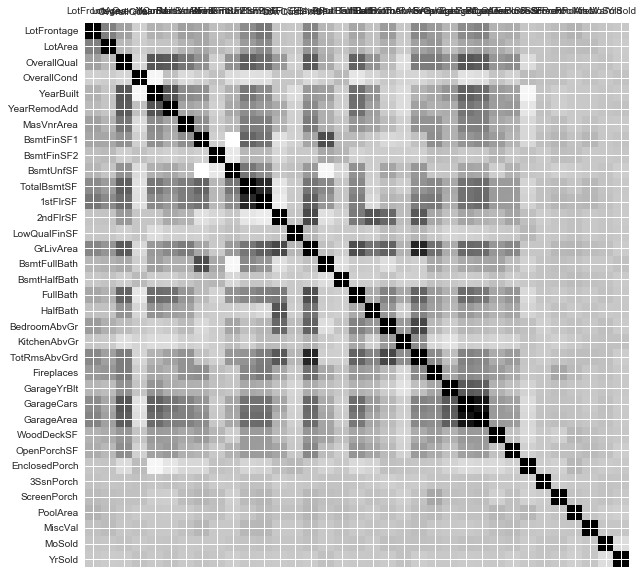

In [31]:
plot_corr(all_data, size = 10)

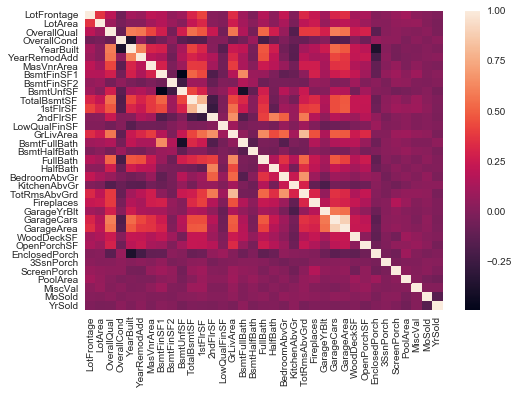

In [30]:
import seaborn as sns
corr = all_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

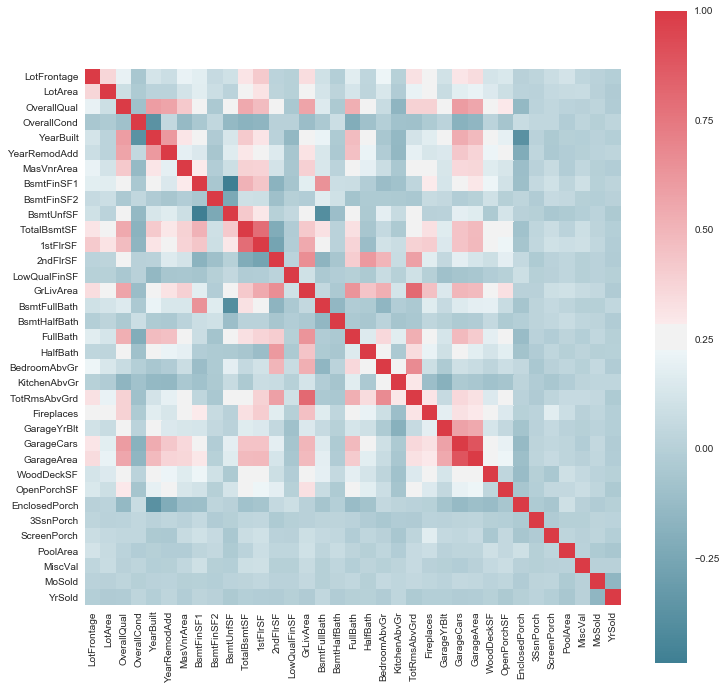

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(12, 12))
corr = all_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

all_data['Total_sqr_footage'] = (all_data['BsmtFinSF1'] + all_data['BsmtFinSF2'] +
                                 all_data['1stFlrSF'] + all_data['2ndFlrSF'])

all_data['Total_Bathrooms'] = (all_data['FullBath'] + (0.5*all_data['HalfBath']) + 
                               all_data['BsmtFullBath'] + (0.5*all_data['BsmtHalfBath']))

all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] +
                              all_data['EnclosedPorch'] + all_data['ScreenPorch'] +
                             all_data['WoodDeckSF'])


#simplified all_data
all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)